## Task 2 : Prediction using Unsupervised ML

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
%matplotlib inline

## Reading the Data

In [54]:
df = pd.read_csv('Iris.csv',index_col='Id')

In [55]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [57]:
df.shape

(150, 5)

### Plotting the Data

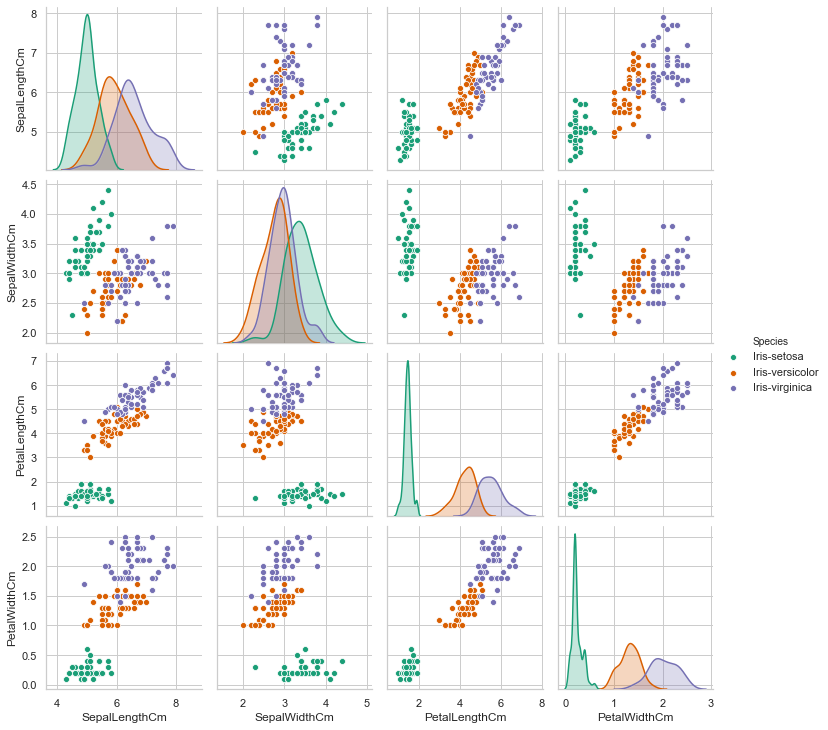

In [58]:
sns.set(style='whitegrid')
sns.pairplot(df,hue='Species',palette='Dark2')

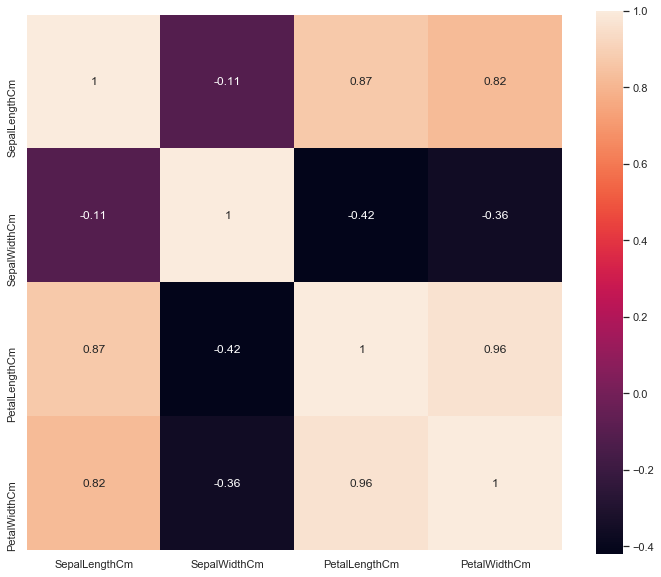

In [59]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,square=True)

## Scalling

Here as we see that the different features are on different scales, so to make them in a similar scale we have to do scalling or else it may interfere while modelling.

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('Species',axis=1))

## Clustering with K-Means

In [61]:
from sklearn.cluster import KMeans

Determining the number of clusters suitable for classification using Elbow method.

In [62]:
cluster = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km=km.fit(X)
    cluster.append(km.inertia_)

Text(0, 0.5, 'WCSS')

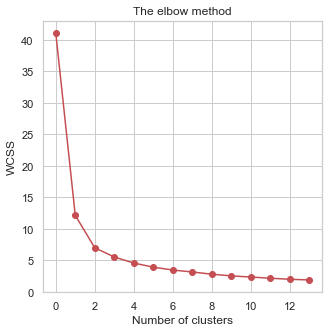

In [63]:
plt.figure(figsize=(5,5))
plt.plot(cluster,'r-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares

So we see that through 'elbow method' the optimum number of cluster be around 3

## Prediction

In [64]:
km = KMeans(n_clusters=3)
km = km.fit(X)
prediction = km.predict(X)

#### Checking the accuracy

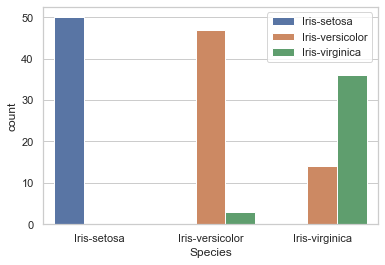

In [65]:
sns.countplot(df['Species'],hue=prediction)
plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'])

This shows that the first plot is Iris-setosa, the second plot seems to be Iris-versicolor as this count is more compared to Iris-virginica and lastly the third one is Iris-virginica.

## Confusion Matrix 

In [66]:
original = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

Text(48.5, 0.5, 'Predicted')

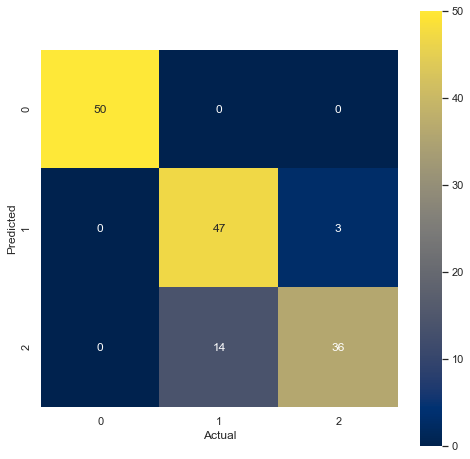

In [68]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(original,prediction),annot=True,square=True,cmap='cividis')
plt.xlabel('Actual')
plt.ylabel('Predicted')

## Plotting the clusters

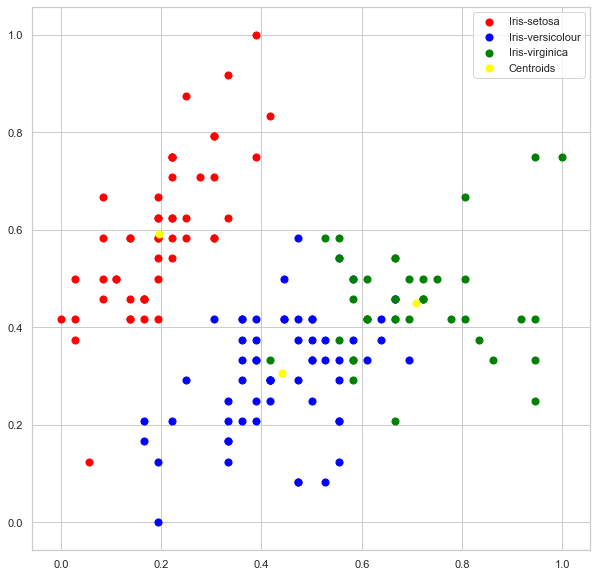

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()